In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\ankur\OneDrive\Desktop\Internship\allrecipe_afterCleaning\allrecipe_0-1000_merge.csv")

In [4]:
df.head()

,ingredients,url,partition,title,id,instructions,Unnamed: 0,calories,protein,carbohydrates,...,cholesterol,vitamin a iu,niacin equivalents,folate,calcium,iron,magnesium,potassium,sodium,calories from fat
0,"[{'text': '1 pound dried red beans, soaked ove...",http://allrecipes.com/recipe/authentic-no-shor...,val,"Authentic, No Shortcuts, Louisiana Red Beans a...",587c9a00a9,[{'text': 'Place the beans and water into a sl...,0.0,285,5,22,...,148,571,1,17,28,2,31,114,142,190
1,"[{'text': '1 (14 ounce) bag green split peas, ...",http://allrecipes.com/recipe/ricks-yummy-split...,train,Rick's Yummy Split Pea Soup with Ham,587f0bd408,[{'text': 'Place the split peas into a large c...,1.0,166,1,31,...,2,1062,0,20,7,0,34,461,11,47
2,"[{'text': '1 1/4 cups milk'}, {'text': '1 cup ...",http://allrecipes.com/recipe/skillet-corn-brea...,train,Skillet Corn Bread,587fca5893,[{'text': 'Preheat oven to 425 degrees F (220 ...,2.0,552,25,67,...,71,1556,13,238,150,8,84,786,324,171
3,[{'text': '4 fluid ounces amaretto (almond fla...,http://allrecipes.com/recipe/the-emily/,train,The Emily,5881213bc1,[{'text': 'Combine the amaretto and sweetened ...,3.0,360,23,37,...,44,613,8,25,223,1,35,475,737,109
4,[{'text': '1 pound bulk mild Italian sausage'}...,http://allrecipes.com/recipe/quick-super-delic...,train,Quick Super-Delicious Zuppa Toscana,588170fd85,[{'text': 'Cook and stir Italian sausage and r...,4.0,154,8,19,...,19,474,1,14,304,0,35,427,104,47


In [5]:
df_nutrients = [df["calories"], df["carbohydrates"], df["cholesterol"], df["sodium"], df["protein"]]

df_nutrients = pd.concat(df_nutrients, axis=1)

In [6]:
df_nutrients.head()

,calories,carbohydrates,cholesterol,sodium,protein
0,285,22,148,142,5
1,166,31,2,11,1
2,552,67,71,324,25
3,360,37,44,737,23
4,154,19,19,104,8


In [7]:
import pandas as pd
from sklearn.cluster import KMeans

In [8]:
features = list(df_nutrients.columns)

### Get the features data
data = df_nutrients[features]

In [9]:
clustering_kmeans = KMeans(n_clusters=8, precompute_distances="auto", n_jobs=-1)
df_nutrients['clusters'] = clustering_kmeans.fit_predict(data)

In [10]:
df_nutrients.clusters.value_counts()

3    520
6    250
0    152
4     36
5      7
7      1
2      1
1      1
Name: clusters, dtype: int64

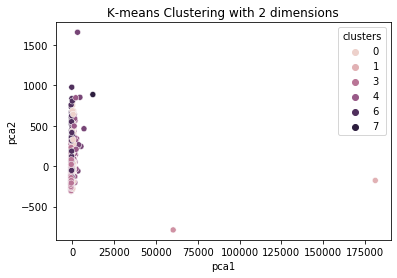

In [11]:
reduced_data = PCA(n_components=2).fit_transform(df_nutrients)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_nutrients['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [12]:
df_nutrients.head()

,calories,carbohydrates,cholesterol,sodium,protein,clusters
0,285,22,148,142,5,3
1,166,31,2,11,1,3
2,552,67,71,324,25,6
3,360,37,44,737,23,6
4,154,19,19,104,8,3


In [13]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_nutrients.drop(["clusters"],axis = 1),),
        columns=['calories', 'carbohydrates', 'cholesterol', 'sodium', 'protein'])

In [14]:
X.head()

,calories,carbohydrates,cholesterol,sodium,protein
0,-0.161647,-0.341998,1.243878,-0.103614,-0.499550
1,-0.694026,-0.022550,-0.814465,-0.124779,-0.771369
2,1.032850,1.255238,0.158314,-0.074209,0.859541
3,0.173886,0.190414,-0.222339,-0.007481,0.723632
4,-0.747712,-0.448480,-0.574795,-0.109753,-0.295687


In [15]:
features = list(X.columns)

### Get the features data
data = X[features]

In [16]:
clustering_kmeans = KMeans(n_clusters=8, precompute_distances="auto", n_jobs=-1)
X['clusters'] = clustering_kmeans.fit_predict(data)

In [17]:
X.clusters.value_counts()

3    384
0    255
1    161
4     68
5     47
7     44
6      8
2      1
Name: clusters, dtype: int64

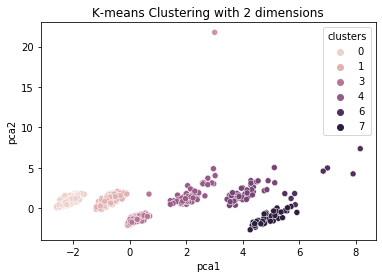

In [18]:
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=X['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [19]:
df_0 = X[clustering_kmeans.labels_==0]

In [20]:
df_0.head()

,calories,carbohydrates,cholesterol,sodium,protein,clusters
6,-0.201911,0.793814,-0.574795,-0.116701,-0.703414,0
21,0.124674,0.580849,0.017332,-0.105553,0.383859,0
28,-0.157174,-0.058045,-0.264633,-0.059829,-0.567505,0
31,-0.099015,-0.164527,-0.278731,0.552025,-0.227732,0
32,-0.000592,0.829308,0.341591,-0.096990,-0.635459,0


In [21]:
df_original_0 = df_nutrients[df_nutrients.index.isin(df_0.index)]

In [22]:
df_original_0.head()

,calories,carbohydrates,cholesterol,sodium,protein,clusters
6,276,54,19,61,2,3
21,349,48,61,130,18,3
28,286,30,41,413,4,6
31,299,27,40,4200,9,5
32,321,55,84,183,3,3


In [29]:
#dataframe from each cluster
df_cluster = []
for i in range(8):
    df_0 = X[clustering_kmeans.labels_==i]
    df_cluster.append(df_nutrients[df_nutrients.index.isin(df_0.index)])
    
    


In [30]:
df_cluster[1].head()

,calories,carbohydrates,cholesterol,sodium,protein,clusters
3,360,37,44,737,23,6
5,475,37,62,267,24,6
9,197,15,65,905,23,0
11,509,38,126,809,27,6
15,616,49,75,229,35,6


In [31]:
#total calorie count from each cluster
calorie_sum_of_each_cluster = []

for i in range(len(df_cluster)):
    sum = 0
    for j in df_cluster[i].calories:
        sum = sum + j
    calorie_sum_of_each_cluster.append(sum)    

In [32]:
print(len(df_cluster))

8


In [33]:
calorie_sum_of_each_cluster

[84802, 64450, 1964, 55818, 45942, 36064, 7089, 14727]

In [34]:
total_sum = 0
for i in calorie_sum_of_each_cluster:
    total_sum = total_sum + i
print(total_sum)

310856


In [35]:
#let BMR value = 3000
BMR = 3000

In [37]:
each_cluster_calories_after_ratio = []
for i in range(len(calorie_sum_of_each_cluster)):
    ratio = (calorie_sum_of_each_cluster[i]/(total_sum))* BMR
    each_cluster_calories_after_ratio.append(ratio)
    

In [38]:
each_cluster_calories_after_ratio

[818.4046632524385,
 621.9921764418251,
 18.954113801888976,
 538.6867231129526,
 443.3757109401137,
 348.0453972257251,
 68.41431402321332,
 142.12690120184266]

In [40]:
df_index_list = []
for i in range(len(df_cluster)):
    df_index_list.append(df_cluster[i].index.tolist())
    
    


In [52]:
df_index_list[2]

[467]

In [42]:
import random
x = random.choice(df_index_list[1])
x

347

In [43]:
j = df.iloc[467]
j.calories

1964

In [44]:
%%time

cal_list = []
for i in range(len(df_index_list)):
    observe = 0
    sum = 0
    count = 0
    while(True):
        x = random.choice(df_index_list[i])
        j = df.iloc[x]

        if j.calories > each_cluster_calories_after_ratio[i]:
            observe = observe + 1
            if observe <= 5:
                continue
            else:
                break
        count = count + 1
        if sum + j.calories <= each_cluster_calories_after_ratio[i]:
            sum = sum + j.calories
            cal_list.append(x) 

        elif ((sum + j.calories - each_cluster_calories_after_ratio[i]) <= 300):
            sum = sum + j.calories
            cal_list.append(x)
            break

        elif count > len(df_index_list[i]):
            break

Wall time: 7.98 ms


In [148]:
s = 0
for i in cal_list:
    s = s + i

In [45]:
cal_list

[933, 130, 21, 545, 900, 131, 193, 337, 809, 343]

In [46]:
each_cluster_calories_after_ratio[1]

621.9921764418251

In [47]:
title = []
ingredients = []
for i in cal_list:
    j = df.iloc[i]
    title.append(j.title)
    ingredients.append(j.ingredients)
    

In [48]:
title

['2-Ingredient Wheat-Free Banana Pancakes (Paleo)',
 "Santa's Whiskers III",
 'Torta di Formaggio (Savory Cheese Torte)',
 'Healthy Harvest Soup',
 "Simple Shepherd's Pie",
 "Deb's Bread and Butter Pickles",
 'Simple Savory Pork Roast',
 'Hearty Vegetable Lasagna',
 'Apple Cheddar Bread',
 'Boxty']